# **Perceptron de Múltiplas Camadas**

Implemente uma rede perceptron de múltiplas camadas e utilize-a para aproximar as funções abaixo. Em seguida, compare os resultados com as curvas exatas. No caso das letras (b) e (c), apresente também a curva do erro médio de treinamento com relação ao número de épocas e a curva do erro médio com o conjunto de validação.

a) a função lógica XOR

**b) f(x) = log₁₀(x), onde 1 ≤ x ≤ 10**

c) f(x) = 10x⁵+5x⁴+2x³–0.5x²+3x+2, onde 0 ≤ x ≤ 20

**Importando as bibliotecas**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score
import matplotlib.pyplot as plt
import random, math

# **Parte 1 - Processamento dos Dados**

**Criando o dataset**

In [ ]:
dados = [([x],[math.log(x, 10)]) for x in [random.uniform(1,10) for _ in range(1000)]]
       
X = []
Y = []
for x, y in dados:
  X.append(x)
  Y.append(y)

X = np.array(X)
Y = np.array(Y)

In [ ]:
print(X[:10])

[[9.44630257]
 [6.78049431]
 [8.03409653]
 [5.57736452]
 [8.82991659]
 [8.9193169 ]
 [4.04135002]
 [1.03537747]
 [6.49426734]
 [3.64978828]]


In [ ]:
print(Y[:10])

[[0.97526185]
 [0.83126136]
 [0.90493705]
 [0.74642903]
 [0.9459566 ]
 [0.95033159]
 [0.60652647]
 [0.01509871]
 [0.81253016]
 [0.56226767]]


**Dividindo o conjunto de dados em conjunto de treinamento e conjunto de teste**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [ ]:
print('Tamanho do conjunto de dados de treinamento:', len(X_train))
print('Tamanho do conjunto de dados de teste:', len(X_test))

Tamanho do conjunto de dados de treinamento: 800
Tamanho do conjunto de dados de teste: 200


# **Parte 2 - Construção da Rede**

In [ ]:
model = tf.keras.models.Sequential([
               tf.keras.layers.Dense(units=6, activation = 'relu', input_dim=1),
               tf.keras.layers.Dense(units=3, activation = 'relu'),
               
               tf.keras.layers.Dense(units=1, activation = 'sigmoid')])

# **Parte 3 - Treinando a Rede**

In [ ]:
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_squared_error'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 6)                 12        
                                                                 
 dense_4 (Dense)             (None, 3)                 21        
                                                                 
 dense_5 (Dense)             (None, 1)                 4         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, batch_size=10,validation_split = 0.2,epochs=200, verbose=2)

Epoch 1/200
64/64 - 1s - loss: 0.2872 - mean_squared_error: 0.1051 - val_loss: 0.2641 - val_mean_squared_error: 0.0861 - 612ms/epoch - 10ms/step
Epoch 2/200
64/64 - 0s - loss: 0.2301 - mean_squared_error: 0.0675 - val_loss: 0.2094 - val_mean_squared_error: 0.0548 - 123ms/epoch - 2ms/step
Epoch 3/200
64/64 - 0s - loss: 0.1685 - mean_squared_error: 0.0416 - val_loss: 0.1514 - val_mean_squared_error: 0.0388 - 136ms/epoch - 2ms/step
Epoch 4/200
64/64 - 0s - loss: 0.1365 - mean_squared_error: 0.0347 - val_loss: 0.1367 - val_mean_squared_error: 0.0378 - 119ms/epoch - 2ms/step
Epoch 5/200
64/64 - 0s - loss: 0.1299 - mean_squared_error: 0.0336 - val_loss: 0.1315 - val_mean_squared_error: 0.0359 - 124ms/epoch - 2ms/step
Epoch 6/200
64/64 - 0s - loss: 0.1250 - mean_squared_error: 0.0314 - val_loss: 0.1264 - val_mean_squared_error: 0.0334 - 117ms/epoch - 2ms/step
Epoch 7/200
64/64 - 0s - loss: 0.1198 - mean_squared_error: 0.0292 - val_loss: 0.1213 - val_mean_squared_error: 0.0308 - 119ms/epoch - 

# **Parte 4 - Avaliando o Modelo**

**Previsão**

In [ ]:
y_pred = model.predict(X_test)
print(f'Score: {round(r2_score(y_test, y_pred)*100,2)}%')

Score: 96.18%


**Gráfico de perda**

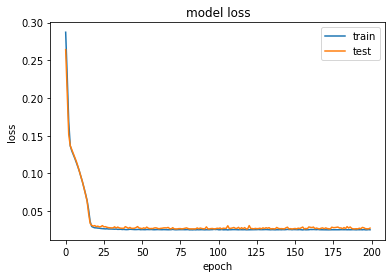

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

**Comparação com a curva da função**

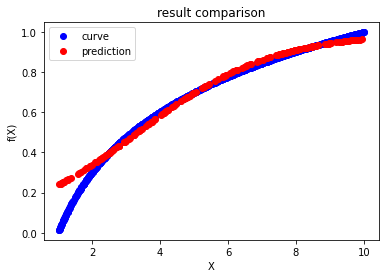

In [ ]:
test_predictions = model.predict(X_test)
plt.plot(X,Y,'bo', label ='curve')
plt.plot(X_test, test_predictions,'ro', label='prediction')
plt.title('result comparison')
plt.xlabel('X')
plt.ylabel('f(X)')
plt.legend()
plt.show()